### Import modules

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets
import io
import moviepy.editor as mpy
from PIL import Image
from scipy.ndimage.filters import gaussian_filter
import seaborn as sns

# Plotting style
plt.style.use('ggplot')
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
%config InlineBackend.figure_format='retina'

# Define study
STUDY_NAME = "opt_flathv_75_1500_withBB_chroma5_1p4"


# Function to generate animations
def mpl_fig2array(plt):
    with io.BytesIO() as buffer:  # use buffer memory
        plt.savefig(buffer, format='png')
        buffer.seek(0)
        img = Image.open(buffer)
        return np.asarray(img)

### Load data

In [2]:
# Load dataframe
df = pd.read_parquet(f"../{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

df


,normalized amplitude in xy-plane,q1,q2,nb,on_x1,oct_current,bunch_nb
name 1,,,,,,,
madx_006,3.844,62.305,60.311,1.400000e+11,250.0,60.0,1963.0
madx_007,3.625,62.305,60.312,1.400000e+11,250.0,60.0,1963.0
madx_008,3.656,62.305,60.313,1.400000e+11,250.0,60.0,1963.0
madx_009,3.875,62.305,60.314,1.400000e+11,250.0,60.0,1963.0
madx_010,4.250,62.305,60.315,1.400000e+11,250.0,60.0,1963.0
...,...,...,...,...,...,...,...
madx_423,4.500,62.321,60.328,1.400000e+11,250.0,60.0,1963.0
madx_424,3.656,62.321,60.329,1.400000e+11,250.0,60.0,1963.0
madx_448,4.219,62.322,60.328,1.400000e+11,250.0,60.0,1963.0


In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="q2", columns="q1", values="normalized amplitude in xy-plane")
df_to_plot


q1,62.305,62.306,62.307,62.308,62.309,62.310,62.311,62.312,62.313,62.314,62.315,62.316,62.317,62.318,62.319,62.320,62.321,62.322,62.323
q2,,,,,,,,,,,,,,,,,,,
60.311,3.844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.312,3.625,4.656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.313,3.656,3.938,5.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.314,3.875,4.531,5.875,5.438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.315,4.250,5.281,5.656,5.469,5.406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.316,4.156,5.375,5.344,5.375,5.469,5.344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.317,4.344,5.312,5.688,5.219,5.375,5.344,5.438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.318,3.875,4.094,5.406,5.562,4.906,5.625,5.469,6.219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.319,4.188,5.156,5.750,5.312,5.531,5.281,5.375,6.688,6.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plot heatmap for tune-tune scan

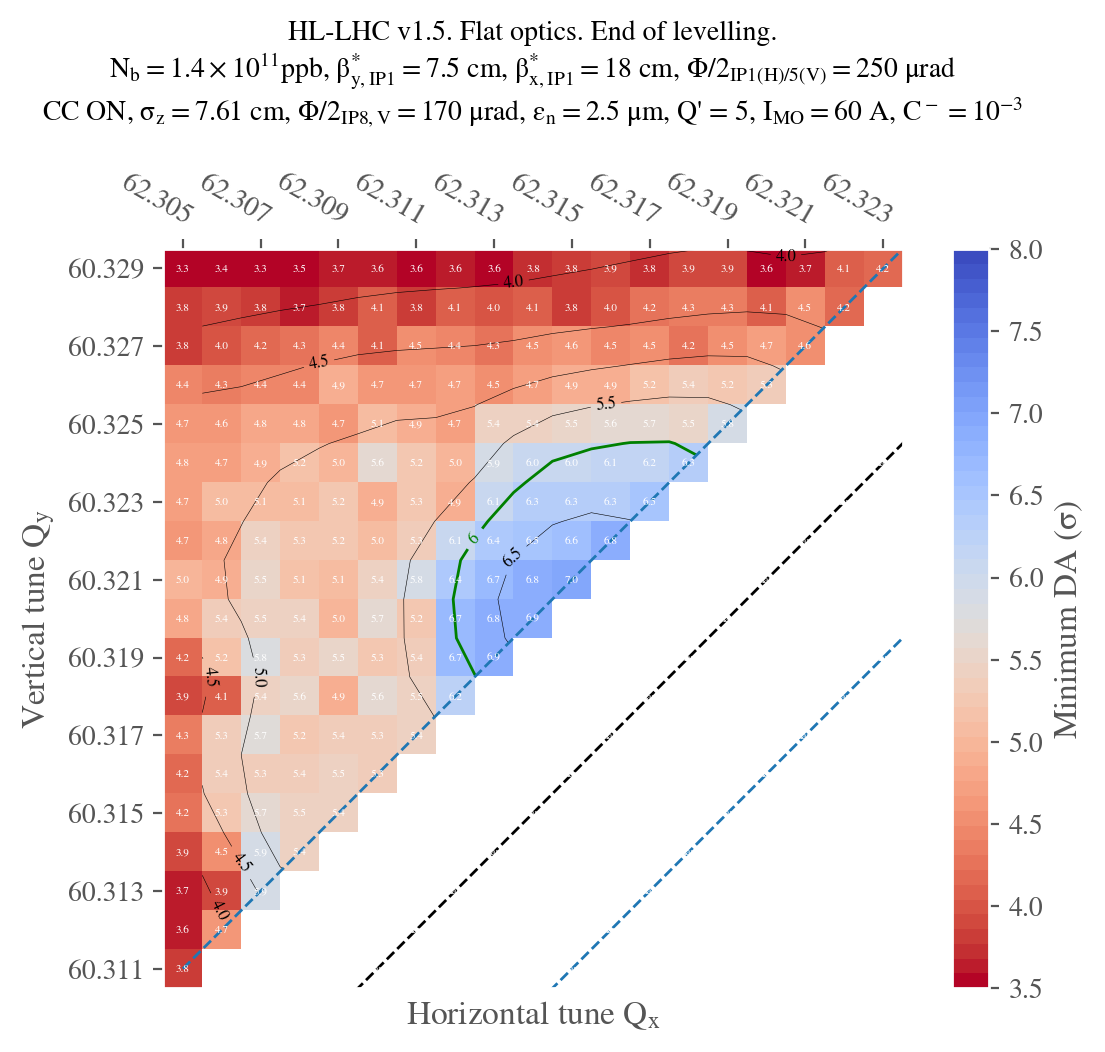

In [6]:
# Function to convert floats to scientific latex format
def latex_float(f):
    float_str = "{0:.2g}".format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        return r"${0} \times 10^{{{1}}}$".format(base, int(exponent))
    else:
        return float_str


def plot_heatmap(df_to_plot):
    # Get numpy array from dataframe
    data_array = df_to_plot.to_numpy()


    # Mask lower triangle
    #mask =  np.tri(data_array.shape[0], k=-1)
    #data_array = np.ma.array(data_array, mask=mask) # mask out the lower triangle
    cmap = matplotlib.cm.get_cmap("coolwarm_r", 50)
    cmap.set_bad('w')

    fig, ax = plt.subplots()
    im = ax.imshow(data_array, cmap=cmap, vmin=3.5, vmax=8)
    ax.invert_yaxis()

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(df_to_plot.columns))[::2], labels=df_to_plot.columns[::2])
    ax.set_yticks(np.arange(len(df_to_plot.index))[::2], labels=df_to_plot.index[::2])


    # Loop over data dimensions and create text annotations.
    for i in range(len(df_to_plot.index)):
        for j in range(len(df_to_plot.columns)):
            text = ax.text(
                j, i, f"{data_array[i, j]:.1f}", ha="center", va="center", color="w", fontsize=4
            )
            
    # Smooth data for contours
    # make the matrix symmetric by replacing the lower triangle with the upper triangle
    data_smoothed = np.copy(data_array)
    data_smoothed[np.isnan(data_array)] = 0
    data_smoothed = data_smoothed + data_smoothed.T - np.diag(data_array.diagonal())
    data_smoothed = gaussian_filter(data_smoothed, 1.0)

    # Mask the lower triangle of the smoothed matrix
    mask =  np.tri(data_smoothed.shape[0], k=-1)
    mx = np.ma.masked_array(data_smoothed, mask=mask.T)
    #data_smoothed = data_array

    # Plot contours
    CSS = ax.contour(
        np.arange(0.5, data_array.shape[1]),
        np.arange(0.5, data_array.shape[0]),
        mx,
        colors="black",
        levels=list(np.arange(3, 6, 0.5)) + list(np.arange(6.5, 10, 0.5)),
        linewidths=0.2,
    )
    ax.clabel(CSS, inline=True, fontsize=6)
    CS2 = ax.contour(
        np.arange(0.5, data_array.shape[1]),
        np.arange(0.5, data_array.shape[0]),
        mx,
        colors="green",
        levels=[6],
        linewidths=1,
    )
    ax.clabel(CS2, inline=1, fontsize=6)

    # ! Diagonal lines must be plotted after the contour lines, because of bug in matplotlib
    # Identity line
    ax.plot([0, 1000], [0, 1000], color="tab:blue", linestyle="--", linewidth=1)
    # plus minus 0.05 line (Q increment is 10**-3)
    ax.plot([0, 1000], [-10, 990], color="tab:blue", linestyle="--", linewidth=1)
    ax.plot([0, 1000], [-5, 995], color="black", linestyle="--", linewidth=1)

    ax.set_title(
        "HL-LHC v1.5. Flat optics. End of levelling."
        + "\n"
        + f"$N_b = $"
        + latex_float(df.nb.min())
        + "ppb, "
        + r"$\beta^{*}_{y,IP1} = 7.5$ cm"
        + ", "
        + r"$\beta^{*}_{x,IP1} = 18$ cm"
        + ", "
        + r"$\Phi/2_{IP1(H)/5(V)} = 250$ $\mu rad$"
        + "\n"
        + "CC ON, "
        + r"$\sigma_{z} = 7.61$ $cm$"
        + ", "
        + r"$\Phi/2_{IP8,V} = 170$ $\mu rad$"
        + ", "
        + r"$\epsilon_{n} = 2.5$ $\mu m$"
        + ", "
        + r"Q' = 5"
        + ", "
        + r"$I_{MO} = 60$ $A$"
        + ", "
        + r"$C^-=10^{-3}$" + "\n",
        fontsize=10,
    )
    ax.set_xlabel("Horizontal tune " + r"$Q_x$")
    ax.set_ylabel("Vertical tune " + r"$Q_y$")
    ax.set_xlim(0 - 0.5, data_array.shape[1] - 0.5)
    ax.set_ylim(0 - 0.5, data_array.shape[0] - 0.5)

    # Ticks on top
    ax.xaxis.tick_top()
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel("Minimum DA (" + r"$\sigma$" + ")", rotation=90, va="bottom", labelpad=15)
    plt.grid(visible=None)
    plt.savefig("output_" + STUDY_NAME + ".pdf", bbox_inches="tight")
    plt.show()


plot_heatmap(df_to_plot)
